In [28]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [29]:
from google.colab import files

uploaded = files.upload()

Saving tested.csv to tested (1).csv


In [30]:
df = pd.read_csv("tested.csv")

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())




Dataset Shape: (418, 12)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


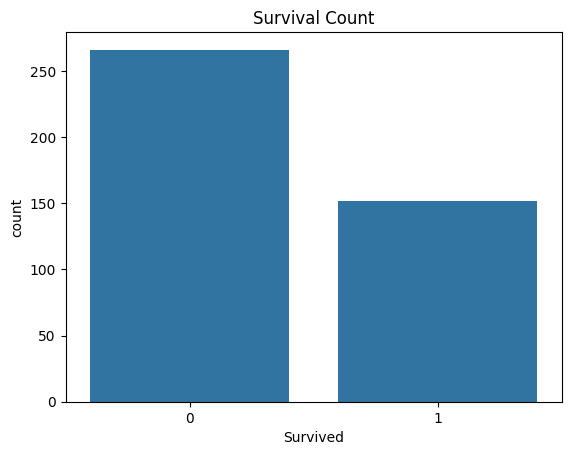

In [34]:
if 'Survived' in df.columns:
    sns.countplot(data=df, x='Survived')
    plt.title("Survival Count")
    plt.show()

In [35]:
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-35-03890c066829>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-35-03890c066829>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [36]:
le = LabelEncoder()
if 'Sex' in df.columns:
    df['Sex'] = le.fit_transform(df['Sex'])

if 'Embarked' in df.columns:
    df['Embarked'] = le.fit_transform(df['Embarked'])

In [37]:
drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId']
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [42]:

if 'Survived' in df.columns:
    X = df.drop(columns=['Survived'])
    y = df['Survived']

    # Split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    # Raise an error only if Survived column is missing
    raise Exception("The dataset must contain a 'Survived' column for supervised learning.")


In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 1.0000


In [47]:
predictions = model.predict(X)

result_df = df.copy()
result_df['Predicted_Survived'] = predictions

# result
result_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted_Survived
0,0,3,1,34.5,0,0,7.8292,1,0
1,1,3,0,47.0,1,0,7.0000,2,1
2,0,2,1,62.0,0,0,9.6875,1,0
3,0,3,1,27.0,0,0,8.6625,2,0
4,1,3,0,22.0,1,1,12.2875,2,1


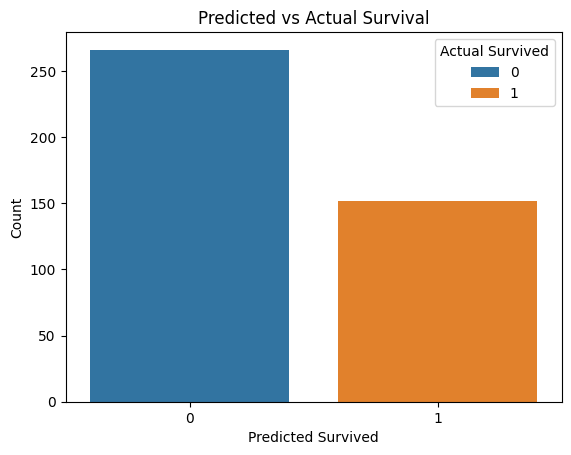

In [48]:
sns.countplot(x='Predicted_Survived', hue='Survived', data=result_df)
plt.title('Predicted vs Actual Survival')
plt.xlabel('Predicted Survived')
plt.ylabel('Count')
plt.legend(title='Actual Survived')
plt.show()

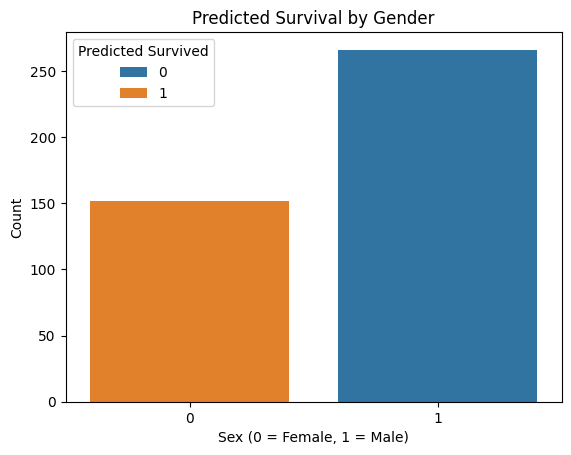

In [49]:
if 'Sex' in result_df.columns:
    sns.countplot(x='Sex', hue='Predicted_Survived', data=result_df)
    plt.title('Predicted Survival by Gender')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.ylabel('Count')
    plt.legend(title='Predicted Survived')
    plt.show()


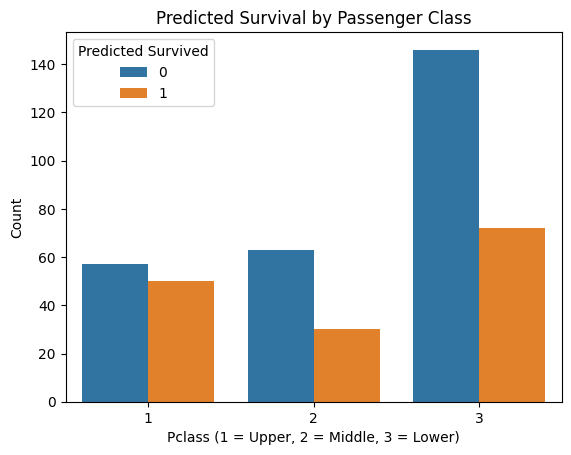

In [50]:
if 'Pclass' in result_df.columns:
    sns.countplot(x='Pclass', hue='Predicted_Survived', data=result_df)
    plt.title('Predicted Survival by Passenger Class')
    plt.xlabel('Pclass (1 = Upper, 2 = Middle, 3 = Lower)')
    plt.ylabel('Count')
    plt.legend(title='Predicted Survived')
    plt.show()


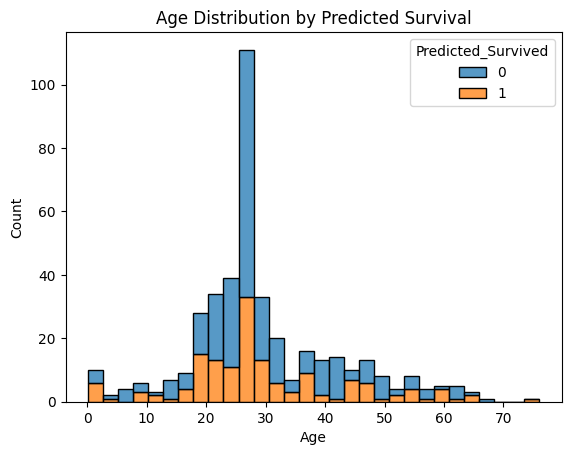

In [51]:
if 'Age' in result_df.columns:
    sns.histplot(data=result_df, x='Age', hue='Predicted_Survived', multiple='stack', bins=30)
    plt.title('Age Distribution by Predicted Survival')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
